In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

### Generate dataset

In [3]:
# making cluster with 200 data points in 2-dimension with 3 noisy clusters
blob_data = make_blobs(n_samples=200, n_features=2, centers=3)
# the tuple of generated sample contains =>(data points in 2d, respective cluster it belongs to)
data = blob_data[0]
labels = blob_data[1]

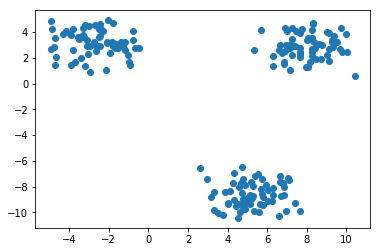

In [4]:
# Plotting the data points in 2d
datax = data[:,0]
datay = data[:, 1]
plt.scatter(datax, datay)

### Implementing my own K-Means

In [5]:
class KMeansMy(object):
    
    def __init__(self, n_centers, threshold=1e-4):
        self.n_centers = n_centers
        self.threshold = threshold
        self.centers = None
        self.prev_centers = None
        self.data = None
        self.n_dim = None
        self.data_cluster = None
        self.distances = None
        
    def set_data(self, data):
        self.data = data
        self.n_dim = self.data.shape[-1]
        
    def generate_centers_uniformly(self):
        self.centers = np.random.uniform(low = self.data.min(axis=0),
                                         high = self.data.max(axis=0),
                                         size = (self.n_centers,self.n_dim))
        return self.centers
    
    def generate_centers_sampling(self):
        rand_index = np.random.randint(low = 0, 
                                       high = self.data.shape[0], 
                                       size = self.n_centers)
        self.centers = self.data[rand_index]
        return self.centers
    
    def _distance_(self,point1, point2):
        diff = point1 - point2 # difference between center and data point
        sqrd = np.square(diff) # elementwise squaring 
        sumd = np.sum(sqrd, axis=1) # not summing all data. but only n_features,i.e. columns (axis = 1)
        sqrt = np.sqrt(sumd) # square root after sum
        return sqrt
    
    
    def calculate_distance(self):
        dist = []
        for center in self.centers:
#             diff = self.data - center # difference between center and data point
#             sqrd = np.square(diff) # elementwise squaring 
#             sumd = np.sum(sqrd, axis=1) # not summing all data. but only n_features,i.e. columns (axis = 1)
#             sqrt = np.sqrt(sumd) # square root after sum
            sqrt = self._distance_(self.data, center)
            dist.append(sqrt) # collecting all the sum

        self.distances = np.array(dist)
        return self.distances
    
    def assign_clusters(self):
        self.data_cluster = np.argmin(self.distances,
                                      axis = 0) # finding minimum over the the centers
        return self.data_cluster
    
    def update_centers(self):
        self.prev_centers = np.copy(self.centers)
        for index in range(self.n_centers):
            self.centers[index] = np.mean(self.data[self.data_cluster == index],
                                          axis=0) # mean among the row .: axis=0
        return self.centers
    
    def is_optimal(self):
        non_optimal = np.abs(self.prev_centers - self.centers) > self.threshold
        if non_optimal.astype(int).sum() == 0:
            return True
        return False
    
    def predict(self, new_data):
        
        if type(new_data) is list :
            new_data = np.array(new_data)
            
        dist = []
        for center in self.centers:
            sqrt = self._distance_(new_data, center)
            dist.append(sqrt) # collecting all the sum
        dsts = np.array(dist)
        
        which_cluster = np.argmin(dsts,axis = 0) # finding minimum over the the centers
        return which_cluster

#### Initializing Centers

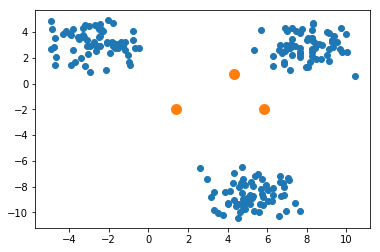

In [15]:
%matplotlib inline
mykmeans = KMeansMy(n_centers=3)
mykmeans.set_data(data)
mykmeans.generate_centers_uniformly()

# Plotting the centers and data points
centers = mykmeans.centers
plt.scatter(data[:,0], data[:, 1])
plt.scatter(centers[:,0], centers[:, 1], marker='o', lw=5)

#### Calculating distance, Assigning points to different Clusters

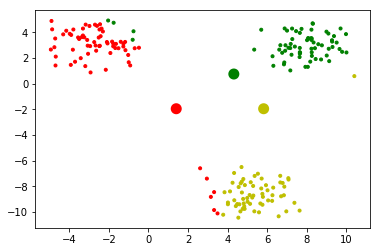

In [16]:
mykmeans.calculate_distance()
mykmeans.assign_clusters()
belongto = mykmeans.data_cluster

color_list = ['r', 'g', 'y']

plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
plt.scatter(datax, datay, marker = '.', c=belongto, cmap=matplotlib.colors.ListedColormap(color_list))

#### Update the centers for the cluster

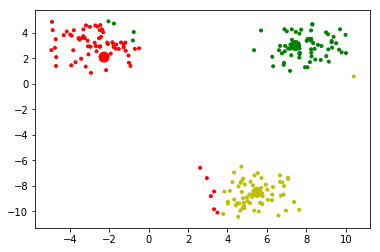

In [17]:
mykmeans.update_centers()
centers = mykmeans.centers
plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
plt.scatter(datax, datay, marker = '.', c=belongto, cmap=matplotlib.colors.ListedColormap(color_list))

#### Is solution Optimal ??  (change < threshold)

In [18]:
mykmeans.is_optimal()

False

### Continuous K-Means

Loop Finished 0
Loop Finished 1
Loop Finished 2
Loop Finished 3
Loop Finished 4
Loop Finished 5
Loop Finished 6
Loop Finished 7
Loop Finished 8
Loop Finished 9
Loop Finished 10
Loop Finished 11
Optimal Cluster Found


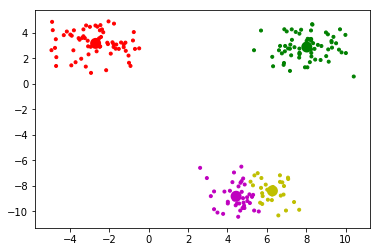

In [19]:
%matplotlib tk
fig = plt.figure()
fig.show()

color_list = ['r', 'g', 'y', 'm']

mykmeans = KMeansMy(n_centers=4)
mykmeans.set_data(data)
mykmeans.generate_centers_uniformly()

# Plotting the centers and data points
centers = mykmeans.centers
plt.scatter(datax, datay, marker='.')
plt.scatter(centers[:,0], centers[:, 1], marker='o', lw=5)

for i in range(100):
    mykmeans.calculate_distance()
    mykmeans.assign_clusters()
    
    plt.pause(1)
    fig.clear()
    belongto = mykmeans.data_cluster
    plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
    plt.scatter(datax, datay, marker = '.', c=belongto, cmap=matplotlib.colors.ListedColormap(color_list))
    fig.canvas.draw()
    
    mykmeans.update_centers()
    centers = mykmeans.centers
    
    plt.pause(1)
    fig.clear()
    plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
    plt.scatter(datax, datay, marker = '.', c=belongto, cmap=matplotlib.colors.ListedColormap(color_list))
    fig.canvas.draw()
    print('Loop Finished', i)
    
    if mykmeans.is_optimal():
        print('Optimal Cluster Found')
        plt.pause(3)
        break

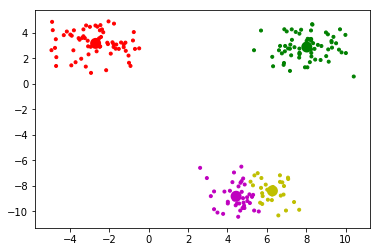

In [20]:
% matplotlib inline
plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
plt.scatter(datax, datay, marker = '.', c=belongto, cmap=matplotlib.colors.ListedColormap(color_list))

In [21]:
# testing obvious test points
test_data = np.array([[4,2], [6,-4], [0,-4], [10,-8]])
mykmeans.predict(test_data)

array([1, 2, 3, 2])

### Decision Boundary

In [22]:
h = 0.1
xx, yy = np.meshgrid(np.arange(datax.min(), datax.max(), h), np.arange(datay.min(), datay.max(), h))

In [23]:
xxyy = np.c_[xx.ravel(), yy.ravel()]
classxy = mykmeans.predict(xxyy)

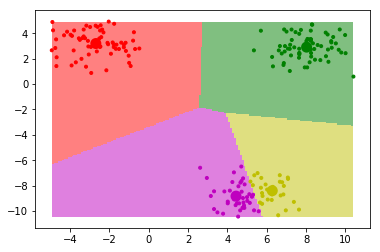

In [24]:
# advanced way of showing
plt.imshow(classxy.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=matplotlib.colors.ListedColormap(color_list),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
plt.scatter(datax, datay, marker = '.', c=belongto, cmap=matplotlib.colors.ListedColormap(color_list))

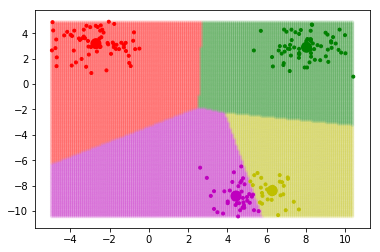

In [25]:
# myway of showing borders
plt.scatter(centers[:,0], centers[:, 1], marker='o', c=color_list,lw=5)
plt.scatter(xx.ravel(), yy.ravel(), marker = '.', c=classxy, cmap=matplotlib.colors.ListedColormap(color_list), alpha=0.1)
plt.scatter(datax, datay, marker = '.', c=belongto, cmap=matplotlib.colors.ListedColormap(color_list))